# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.076795e+01     7.503771e+00
 * time: 0.0020389556884765625
     1     2.850236e+01     6.173472e+00
 * time: 0.008480072021484375
     2     2.104104e+01     6.919747e+00
 * time: 0.015841007232666016
     3     1.491597e+01     4.598344e+00
 * time: 0.023647069931030273
     4     1.126953e+01     1.938035e+00
 * time: 0.030544042587280273
     5     1.053462e+01     2.504776e+00
 * time: 0.03644394874572754
     6     9.941404e+00     1.738964e+00
 * time: 0.0425260066986084
     7     9.324278e+00     1.413210e+00
 * time: 0.048799991607666016
     8     8.865733e+00     1.267031e+00
 * time: 0.05532193183898926
     9     8.667788e+00     1.081462e+00
 * time: 0.061949968338012695
    10     8.541607e+00     9.737555e-01
 * time: 0.06846785545349121
    11     8.421264e+00     7.820865e-01
 * time: 0.07505106925964355
    12     8.416931e+00     1.149503e+00
 * time: 0.11214494705200195
    13     8.342651e+00     8.691841e-01
 

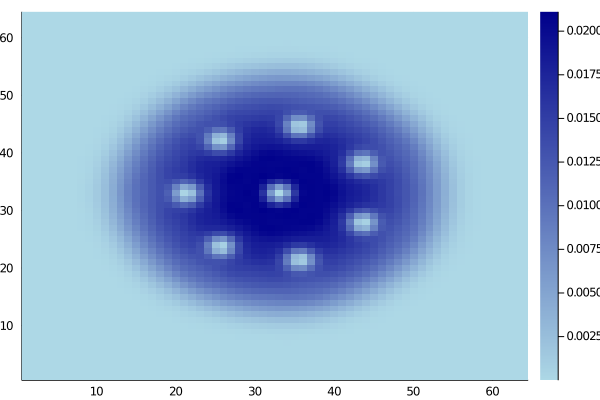

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)